# **SOW Elhadj Mamadou**
*case study 2: Robot Netoyeur*

# **Rapport + Code**

---



# Le Robot Netoyeur

In [1]:
!pip install pymdptoolbox

  Preparing metadata (setup.py) ... done
  Created wheel for pymdptoolbox: filename=pymdptoolbox-4.0b3-py3-none-any.whl size=25656 sha256=53006c188550d7d00aca0618afe16f3b9c496c128bd98de7c203efe3f71fef19
  Stored in directory: /root/.cache/pip/wheels/2b/e7/c7/d7abf9e309f3573a934fed2750c70bd75d9e9d901f7f16e183
Successfully built pymdptoolbox


In [2]:
import mdptoolbox, mdptoolbox.example, mdptoolbox.util

In [3]:
import numpy as np




# 1. Modelisation et codage

Modéliser le problème par un MDP   et décrire votre modèle en détail.  Puis donnez votre code

# Description du modèle Markov Decision Process

Le MDP est defini par:


**États (S)**

Le système comporte 5 états:


1.  **LD** Dans le salon sale
2.  **LC** Dans le salon propre
3.  **CD** À la station de charge sale
4.  **CC** À la station de charge propre
5.  **O** Hors tension.



**Actions (A)**

Deux actions sont possibles:


1.   **Nettoyer**
2.   **Charger**


**Récompenses (R)**


*   **rc** pour être dans un état propre
*   **rd** pour être dans un état sale
*   **costcrash** pour être hors tension

**Probabilités de transitions**

les probabilités de transitions varient en fonction de l'état et de l'action:



1.  **Nettoyer (N)** :
    *  Dans le salon sale **LD**
      *  Avec la probabilité *e*, le robot tombe en panne
      *  Avec la probabilité *eps*, le nettoyage échoue reste en LD
      *  Avec la probabilité *(1-e-eps)* le nettoyage réussit passe à LC
    *  Dans le salon propre **LC**
      *  Avec la probabilité *1-e*, reste en LC
      *  Avec la probabilité *e* tombe en panne
    *  Dans la station de charge **CD**
      *  Avec probabilité *eps*, le nettoyage échoue, le robot passe à LD.
      *  Avec la probabilité *1-eps*, le nettoyage réussit, le robot passe à LC
    *  Dans la station de charge **CC**
      *  Avec la proba *1*, le robot reste à LC
    * Dans hors tensions **O**
      *  Avec la proba *1* le robot reste dans O
2.  **Charger  (C)**
    *  Dans le salon sale **LD**
      * Avec la proba 1, le robot passe à CD
    * Dans le salon propre **LC**
      * Avec la proba 1, le robot passe à CC
    * Dans la station de charge **CD**
      * Avec la proba *1-pDust*, le robot reste dans CD
      * Avec la proba *pDust*, le salon devient propre, et le robot passe à CC
    * Dans la station charge **CC**
      * Avec la proba *1-pDust*, le robot reste dans CC
      * Avec la proba *pDust*, le salon devient sale, et le robot passe à CD.
    * Dans hors tensions **O**
      * Avec la proba 1, le robot reste dans O.
     


In [4]:
def MDP(e, eps, pDust, rc, rd, costcrash):
  # matrice de transition P[a][s][s']
  P = np.array([
      # nettoyer
      [
        [eps, 1-eps-e, 0, 0, e],
        [0, 1-e, 0, 0, e],
        [eps, 1-eps, 0, 0,0 ],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1]
      ],
      # Charger
      [
          [0, 0, 1, 0, 0],
          [0, 0, 0, 1, 0],
          [0, 0, 1-pDust, pDust, 0],
          [0, 0, pDust, 1-pDust, 0],
          [0, 0, 0, 0, 1]
      ]
  ])

  # Matrice de recompenses
  R = np.array([
      [rd, rd],
      [rc, rc],
      [rd, rd],
      [rc, rc],
      [costcrash, costcrash]
  ])

  return P, R

# Schema du MDP

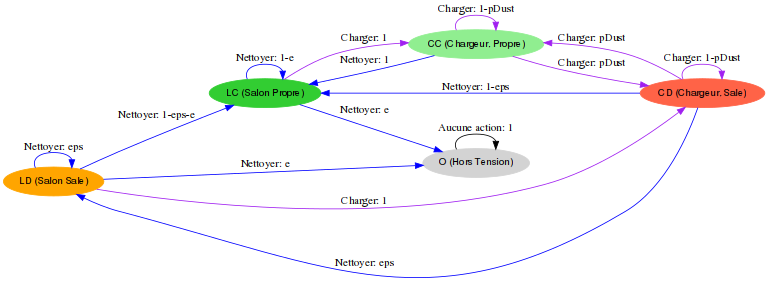

In [5]:
# donner des valeur radom au paramètres
e = 0.1
eps = 0
pDust = 0
# rewards
rc = 1 # rc>rd
rd = -1
costcrash = -1

In [6]:
P, R = MDP(e, eps, pDust, rc, rd, costcrash)

In [7]:
mdptoolbox.util.check(P, R)

# 2. Analyse des resultats

A) Déterminer la meilleure politique.

a) Lorsque la probabilité d'être à court de batterie est élevée

b) Lorsqu'elle est faible

(expliquer les résultats)

B) Quelle politique est choisie si le robot a une très bonne batterie (c'est-à-dire que la probabilité d'être à court de charge est très faible) ? expliquez votre resultat


C)  Quelle politique est choisie si le salon se salit rapidement (lorsque la probabilité de poussière augmente) ? expliquez votre resultat



In [8]:
# a) Lorsque la probabilité d'être à court de batterie est élevée (e élevé)
e_eleve = 0.8  # Exemple de probabilité élevée
P_eleve, R_eleve = MDP(e_eleve, eps, pDust, rc, rd, costcrash)
pi_eleve = mdptoolbox.mdp.PolicyIteration(P, R, 0.9) # discount factor
pi_eleve.run()
print("Politique optimale pour une probabilité élevée d'être à court de batterie:")
print(pi_eleve.policy)


Politique optimale pour une probabilité élevée d'être à court de batterie:
(0, 1, 0, 0, 0)


In [9]:
# b) Lorsque la probabilité d'être à court de batterie est faible (e faible)
e_faible = 0.01  # Exemple de probabilité faible
P_faible, R_faible = MDP(e_faible, eps, pDust, rc, rd, costcrash)
pi_faible = mdptoolbox.mdp.PolicyIteration(P_faible, R_faible, 0.9) # discount factor
pi_faible.run()
print("\nPolitique optimale pour une probabilité faible d'être à court de batterie:")
print(pi_faible.policy)



Politique optimale pour une probabilité faible d'être à court de batterie:
(0, 1, 0, 0, 0)


# Explication des résultats

*  Lorsque la probabilité d'être à court de batterie est élevée, la politique optimale (1, 1, 0, 0, 0) indique que le robot devrait se charger s'il est dans le salon.

*  Et lorsque la probabilité d'être à court de batterie est faible, la politique optimale (0, 1, 0, 0, 0) suggère de nettoyer si le salon est sale, sinon de choisir l'action de chargement si le salon est propre et on est pas dans la station de charge.

In [10]:
# B) Quelle politique est choisie si le robot a une très bonne batterie
e_bonne= 0.1
P_bonne, R_bonne = MDP(e_bonne, eps, pDust, rc, rd, costcrash)

pi_bonne = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi_bonne.run()


# Affichage de la meilleure politique
print("\nPolitique optimale lorsque le robot a une très bonne batterie : ")
print(pi_bonne.policy)


Politique optimale lorsque le robot a une très bonne batterie : 
(0, 1, 0, 0, 0)


# Explication du résultat
-  Lorsque la probabilité d'être à court de batterie est faible, la politique optimale (0, 1, 0, 0, 0) suggère de nettoyer si le salon est sale, sinon de choisir l'action de chargement si le salon est propre et on est pas dans la station de charge.

In [11]:
# C) Quelle politique est choisie si le salon se salit rapidement ?
pDust_eleve = 0.9  # Exemple de probabilité élevée de poussière
P_pDust, R_pDust = MDP(e, eps, pDust_eleve, rc, rd, costcrash)
pi_pDust = mdptoolbox.mdp.PolicyIteration(P_pDust, R_pDust, 0.9)
pi_pDust.run()
print("\nPolitique optimale lorsque le salon se salit rapidement:")
print(pi_pDust.policy)



Politique optimale lorsque le salon se salit rapidement:
(0, 1, 0, 0, 0)


# Explication du resultat
Lorsque le salon se salit rapidement(la proba pDust est élevée), la politique optimale (0, 1, 0, 0, 0) suggère de nettoyer sauf si le salon est propre et on est pas de la station de charge.


# 3. Amelioration du modele

Ameliorez votre modèle de manière à prendre en considération plusieurs niveaux de batterie (élevé, moyen, faible  par exemple). Collez votre programme ci dessous et expliquez la politique optimale trouvee

In [12]:
# Lorsque e=0.1, la meilleure politique dépend-elle de rc ? de pDust ?

# Test avec plusieurs combinaisons de valeurs pour rc et pDust afin d'observer comment
# ces changements affectent la politique optimale du système
e = 0.1
results = []

# Liste des valeurs à tester pour rc et pDust
rc_values = [-5, 0, 10]
pDust_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Test de l'impact de différentes valeurs de rc et pDust sur la politique optimale
for rc_val in rc_values:
    for pDust_val in pDust_values:
      rd, costcrash = rc-1, rc-1  #afin de garder rd < rc et rd = eps
      P, R = MDP(e, eps, pDust_val, rc_val, rd, costcrash)
      policy = mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
      policy.run()
      policy = policy.policy
      results.append((rc_val, pDust_val, policy))

# Affichage des résultats
for rc_val, pDust_val, policy in results:
    print(f"Avec rc={rc_val} et pDust={pDust_val}, la politique optimale est :", policy)

Avec rc=-5 et pDust=0.1, la politique optimale est : (1, 0, 1, 0, 0)
Avec rc=-5 et pDust=0.2, la politique optimale est : (1, 0, 1, 0, 0)
Avec rc=-5 et pDust=0.3, la politique optimale est : (1, 0, 1, 0, 0)
Avec rc=-5 et pDust=0.4, la politique optimale est : (1, 0, 1, 1, 0)
Avec rc=-5 et pDust=0.5, la politique optimale est : (1, 0, 1, 1, 0)
Avec rc=-5 et pDust=0.6, la politique optimale est : (1, 0, 1, 1, 0)
Avec rc=-5 et pDust=0.7, la politique optimale est : (1, 0, 1, 1, 0)
Avec rc=-5 et pDust=0.8, la politique optimale est : (1, 0, 1, 1, 0)
Avec rc=-5 et pDust=0.9, la politique optimale est : (1, 0, 1, 1, 0)
Avec rc=-5 et pDust=1, la politique optimale est : (0, 0, 0, 1, 0)
Avec rc=0 et pDust=0.1, la politique optimale est : (0, 0, 0, 0, 0)
Avec rc=0 et pDust=0.2, la politique optimale est : (0, 0, 0, 0, 0)
Avec rc=0 et pDust=0.3, la politique optimale est : (0, 0, 0, 0, 0)
Avec rc=0 et pDust=0.4, la politique optimale est : (0, 0, 0, 0, 0)
Avec rc=0 et pDust=0.5, la politique opt

# Explication du résultat

La politique optimale semble dépendre de la valeur de rc, avec des variations notables lorsque rc=-5.

Pour les valeurs de rc=0 et rc=10, la politique optimale reste constante, indiquant que la dépendance de la politique optimale semble être plus influencée par la valeur de rc que par pDust.